In [1]:
import pandas as pd

df = pd.read_excel('16P.xlsx')
df

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [2]:
len(df.columns)

62

In [3]:
df.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [4]:
df.dtypes

Response Id                                                                                    int64
You regularly make new friends.                                                                int64
You spend a lot of your free time exploring various random topics that pique your interest     int64
Seeing other people cry can easily make you feel like you want to cry too                      int64
You often make a backup plan for a backup plan.                                                int64
                                                                                               ...  
You are very intrigued by things labeled as controversial.                                     int64
You would pass along a good opportunity if you thought someone else needed it more.            int64
You struggle with deadlines.                                                                   int64
You feel confident that things will work out for you.                                      

In [5]:
print(df.loc[0,'Personality'])
print(type(df.loc[0,'Personality']))

ENFP
<class 'str'>


In [6]:
import numpy as np

X = df.drop(['Personality','Response Id'], axis=1)
class_names, y = np.unique(df['Personality'], return_inverse=True)
class_names

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

X_train.shape, X_test.shape

((47999, 60), (12000, 60))

# IF I choose All features (60 questions)

In [11]:
import tensorflow as tf    

tf.compat.v1.disable_v2_behavior() 

from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20) 

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

from tensorflow import keras

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(60,)))   
model.add(Dense(16, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0, callbacks=[es])

Instructions for updating:
non-resource variables are not supported in the long term


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training.py:2455: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 00074: early stopping


In [12]:
# model.add(Dense(32, activation='relu', input_shape=(60,)))   #

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.17429880183935165
Test accuracy: 0.9723333


Text(0.5, 1.0, 'Loss')

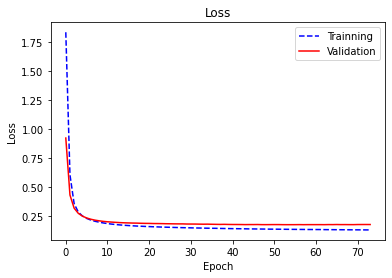

In [13]:
# model.add(Dense(32, activation='relu', input_shape=(60,)))   #

from matplotlib import pyplot as plt

df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')

# If I choose only 20 features (20 questions) : Feature selection

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model(n_feature):
    model_2 = Sequential()

    model_2.add(Dense(32, activation='relu', input_shape=(60,)))  
    model_2.add(Dense(16, activation='softmax'))

    model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
    return model_2

my_model = KerasRegressor(build_fn=base_model, n_feature=20 , nb_epoch=74, batch_size=256, verbose=0)
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=0).fit(X,y)

w = eli5.show_weights(perm, feature_names=X.columns.tolist())
result = pd.read_html(w.data)[0]
result

C:\Users\Panupong Jindarat\AppData\Local\Temp\ipykernel_17420\2087397616.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasRegressor(build_fn=base_model, n_feature=20 , nb_epoch=74, batch_size=256, verbose=0)
c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training.py:2455: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


,Weight,Feature
0,0.0881 ± 0.0015,You are not too interested in discussing vario...
1,0.0818 ± 0.0019,You rarely worry about whether you make a good...
2,0.0798 ± 0.0007,You enjoy going to art museums.
3,0.0798 ± 0.0011,You are more inclined to follow your head than...
4,0.0790 ± 0.0012,Seeing other people cry can easily make you fe...
5,0.0758 ± 0.0017,You find it easy to empathize with a person wh...
6,0.0720 ± 0.0031,You struggle with deadlines.
7,0.0703 ± 0.0011,Your mood can change very quickly.
8,0.0682 ± 0.0019,You are interested in so many things that you ...
9,0.0671 ± 0.0019,You like books and movies that make you come u...


In [32]:
df_features_selected = pd.DataFrame(pd.read_html(w.data)[0])
df_features_selected

,Weight,Feature
0,0.0881 ± 0.0015,You are not too interested in discussing vario...
1,0.0818 ± 0.0019,You rarely worry about whether you make a good...
2,0.0798 ± 0.0007,You enjoy going to art museums.
3,0.0798 ± 0.0011,You are more inclined to follow your head than...
4,0.0790 ± 0.0012,Seeing other people cry can easily make you fe...
5,0.0758 ± 0.0017,You find it easy to empathize with a person wh...
6,0.0720 ± 0.0031,You struggle with deadlines.
7,0.0703 ± 0.0011,Your mood can change very quickly.
8,0.0682 ± 0.0019,You are interested in so many things that you ...
9,0.0671 ± 0.0019,You like books and movies that make you come u...


In [39]:
X_fs = pd.DataFrame()

for i in df_features_selected['Feature'][:-1]:
    X_fs = pd.concat([X_fs,X[i]],axis=1)

X_fs

,You are not too interested in discussing various interpretations and analyses of creative works.,You rarely worry about whether you make a good impression on people you meet.,You enjoy going to art museums.,You are more inclined to follow your head than your heart.,Seeing other people cry can easily make you feel like you want to cry too,You find it easy to empathize with a person whose experiences are very different from yours.,You struggle with deadlines.,Your mood can change very quickly.,You are interested in so many things that you find it difficult to choose what to try next.,You like books and movies that make you come up with your own interpretation of the ending.,You are prone to worrying that things will take a turn for the worse.,You often end up doing things at the last possible moment.,"You have always been fascinated by the question of what, if anything, happens after death.","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know","After a long and exhausting week, a lively social event is just what you need.","You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You feel confident that things will work out for you.,"In your social circle, you are often the one who contacts your friends and initiates activities.","You usually stay calm, even under a lot of pressure",Your happiness comes more from helping others accomplish things than your own accomplishments.
0,1,1,0,1,0,0,0,0,0,-1,0,0,-1,1,-1,0,0,1,0,0
1,0,1,1,-2,-2,0,-1,-2,0,-2,3,-2,1,2,-1,-2,3,-1,-1,1
2,1,0,0,-1,2,0,2,-1,-1,0,0,-1,-1,2,0,2,1,-2,-1,1
3,-1,-1,0,-1,3,-1,-2,0,2,-1,1,-2,1,0,0,0,-1,0,0,-3
4,-1,-1,-2,-1,-1,-1,2,-1,1,2,2,0,2,-1,0,1,-1,3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,1,1,1,-1,0,1,3,0,0,2,2,-3,-1,2,0,2,3,-1,-2,3
59995,-1,-1,-3,-1,-2,0,0,-2,-1,-1,-2,-1,2,0,2,1,-2,-1,3,-1
59996,-1,0,1,1,1,-1,0,0,2,0,0,0,1,-2,1,2,-1,-1,-2,-1
59997,0,1,3,1,1,-2,1,0,-1,3,-2,1,-1,-1,-2,2,0,-1,-2,1


In [40]:
y_fs = y
y_fs

array([ 1, 13,  8, ..., 15, 14,  8], dtype=int64)

In [41]:
from sklearn.model_selection import train_test_split

X_fs_train, X_fs_test,y_fs_train,y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=0) 

X_fs_train.shape, X_fs_test.shape

((47999, 20), (12000, 20))

In [135]:
import tensorflow as tf    

tf.compat.v1.disable_v2_behavior() 

from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20) 

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

from tensorflow import keras

model_final = Sequential()

model_final.add(Dense(128, activation='relu', input_shape=(20,)))
model_final.add(Dense(16, activation='softmax'))

model_final.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history_final = model_final.fit(X_fs_train, y_fs_train, batch_size=256, validation_data=(X_fs_test, y_fs_test), 
                    epochs=1000, verbose=0, callbacks=[es])

c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training.py:2455: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 00073: early stopping


In [136]:
# model.add(Dense(128, activation='relu', input_shape=(20,))) 

score_final = model_final.evaluate(X_fs_test, y_fs_test, verbose=0)
print("Test loss:", score_final[0])
print("Test accuracy:", score_final[1])

Test loss: 0.37591718438267707
Test accuracy: 0.90433335


Text(0.5, 1.0, 'Loss')

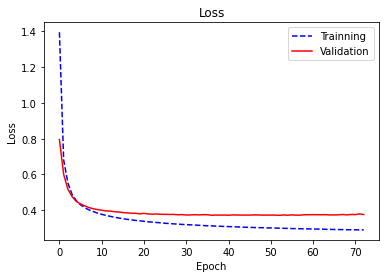

In [137]:
# model.add(Dense(128, activation='relu', input_shape=(20,)))   #

from matplotlib import pyplot as plt

df_hist_final = pd.DataFrame.from_dict(history_final.history)

df_hist_final['loss'].plot(style='b--', label='Trainning')
df_hist_final['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')

In [139]:
### Save Model ###

model_final.save("Model predict MBTI.h5")

In [141]:
from tensorflow.keras.models import load_model

model_load = load_model('Model predict MBTI.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [142]:
score_load = model_load.evaluate(X_fs_test, y_fs_test, verbose=0)
print("Test loss:", score_load[0])
print("Test accuracy:", score_load[1])

c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test loss: 0.37591718438267707
Test accuracy: 0.90433335
